# Problem statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

-Which variables are significant in predicting the demand for shared bikes.

-How well those variables describe the bike demands

 ### Importing necesasary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
import datetime
from scipy.stats import pearsonr

### Importing Warning Library to ignore warnings from displaying on UI

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing StatsModel Library for displaying detailed information about model

In [3]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Importing Scikit Library for evaluating requirement specific parameters and performing preprocessing steps (like Splitting & Scaling)

In [4]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Data Preprocessing

In [5]:
#Loading  data set
bike_data = pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### No null values found in any columns 

In [7]:
bike_data.shape

(730, 16)

In [8]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Converting few columns into catagorical columns for better readability of data 

In [9]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#converting season column into catagorical 
bike_data.season.replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'},inplace=True)

In [11]:
#converting weathersit column into catagorical 
bike_data.weathersit.replace({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'},inplace=True)

In [12]:
#converting mnth into catagorical column 
bike_data.mnth.replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
                        10:'October',11:'November',12:'December'},inplace=True)

In [13]:
# weekday column conversion to categorical
bike_data.weekday.replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)

In [14]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
# Dropping column instant as it has no effect on target column,
# As model targets on cnt column and cnt is sum of casual and registered, we can drop casual and registered columns
#dropping atemp as it is highly correlated to temp
bike_data.drop(['instant','casual','registered'], axis=1, inplace=True)

## step-2 data visualization 

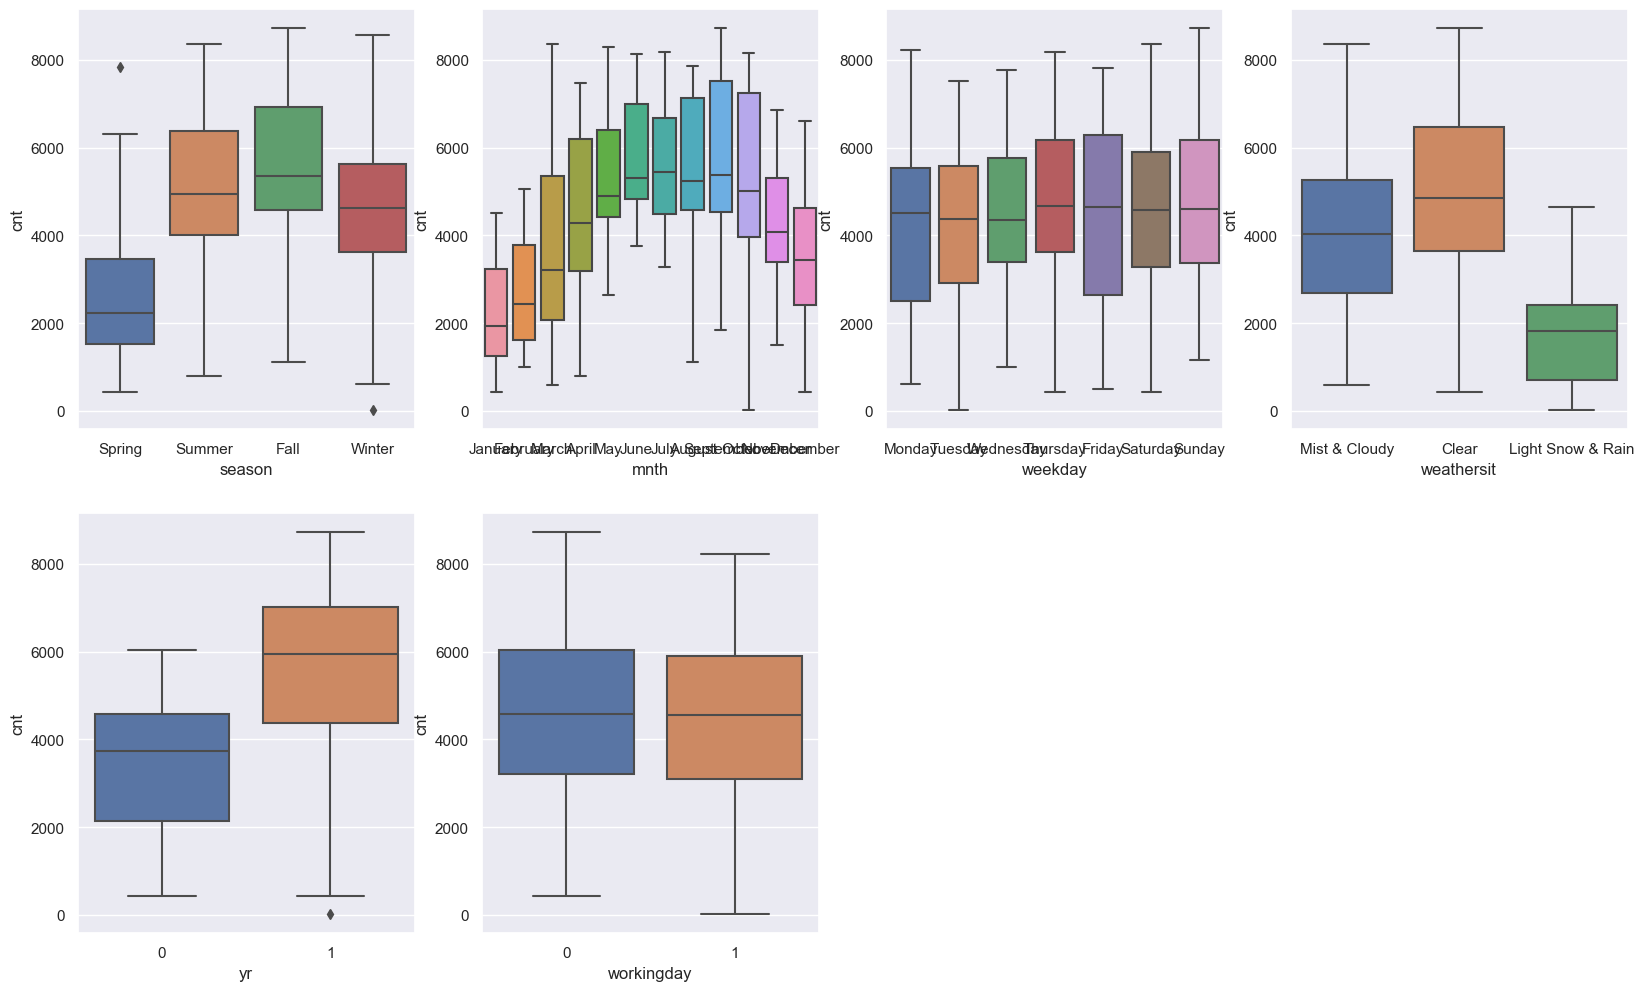

In [16]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)

plt.show()

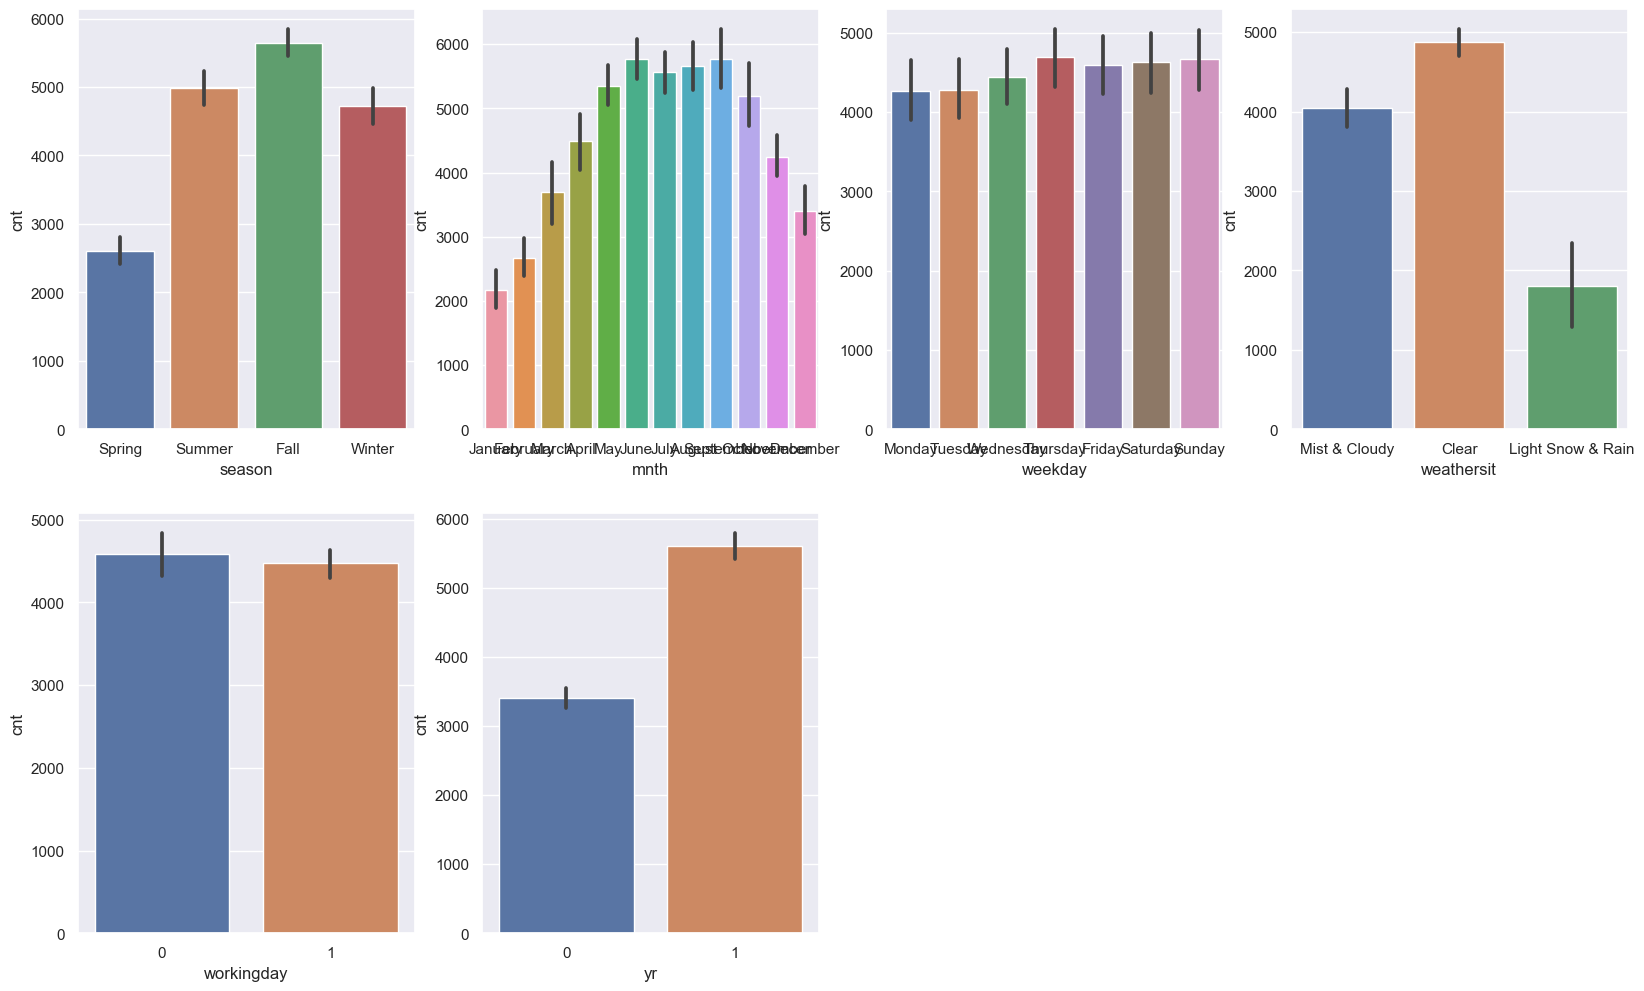

In [17]:
#plotting for catagorical variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.barplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,4,2)
sns.barplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,4,3)
sns.barplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,4,4)
sns.barplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,4,5)
sns.barplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(2,4,6)
sns.barplot(x = 'yr', y = 'cnt', data = bike_data)

plt.show()

#### conclusion

1. Distribution of Ride count mean is different for respective season & month 
2. We see that number of Ride Count drastically increases between May to October which are comparatively Summer & Fall Season in US
3. Number of ride count increase during pleasant weather 

hence season, mnth , weekda and weathersit are good decisive factors 

In [18]:
bike_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [19]:
bike_data.drop(['dteday'],axis=1,inplace=True)
#dteday is not useful as month and weekday are covering it

In [20]:
bike_data.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


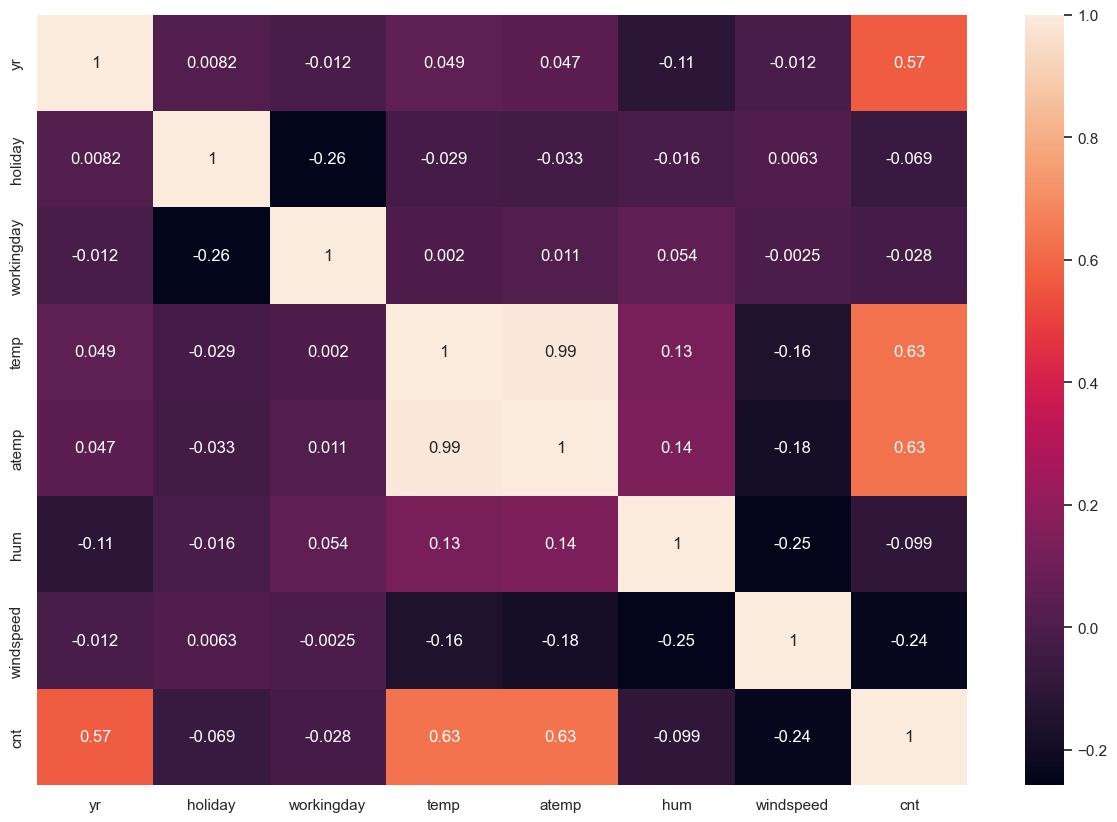

In [21]:
#checking correlation for all numerical column 
bike_corr = bike_data.corr()
plt.figure(figsize=(15,10))

#Drawing Heatmap of correlation
sns.heatmap(bike_corr,annot=True, )
plt.show()

## Visualising Numeric Variables : Using a pairplot

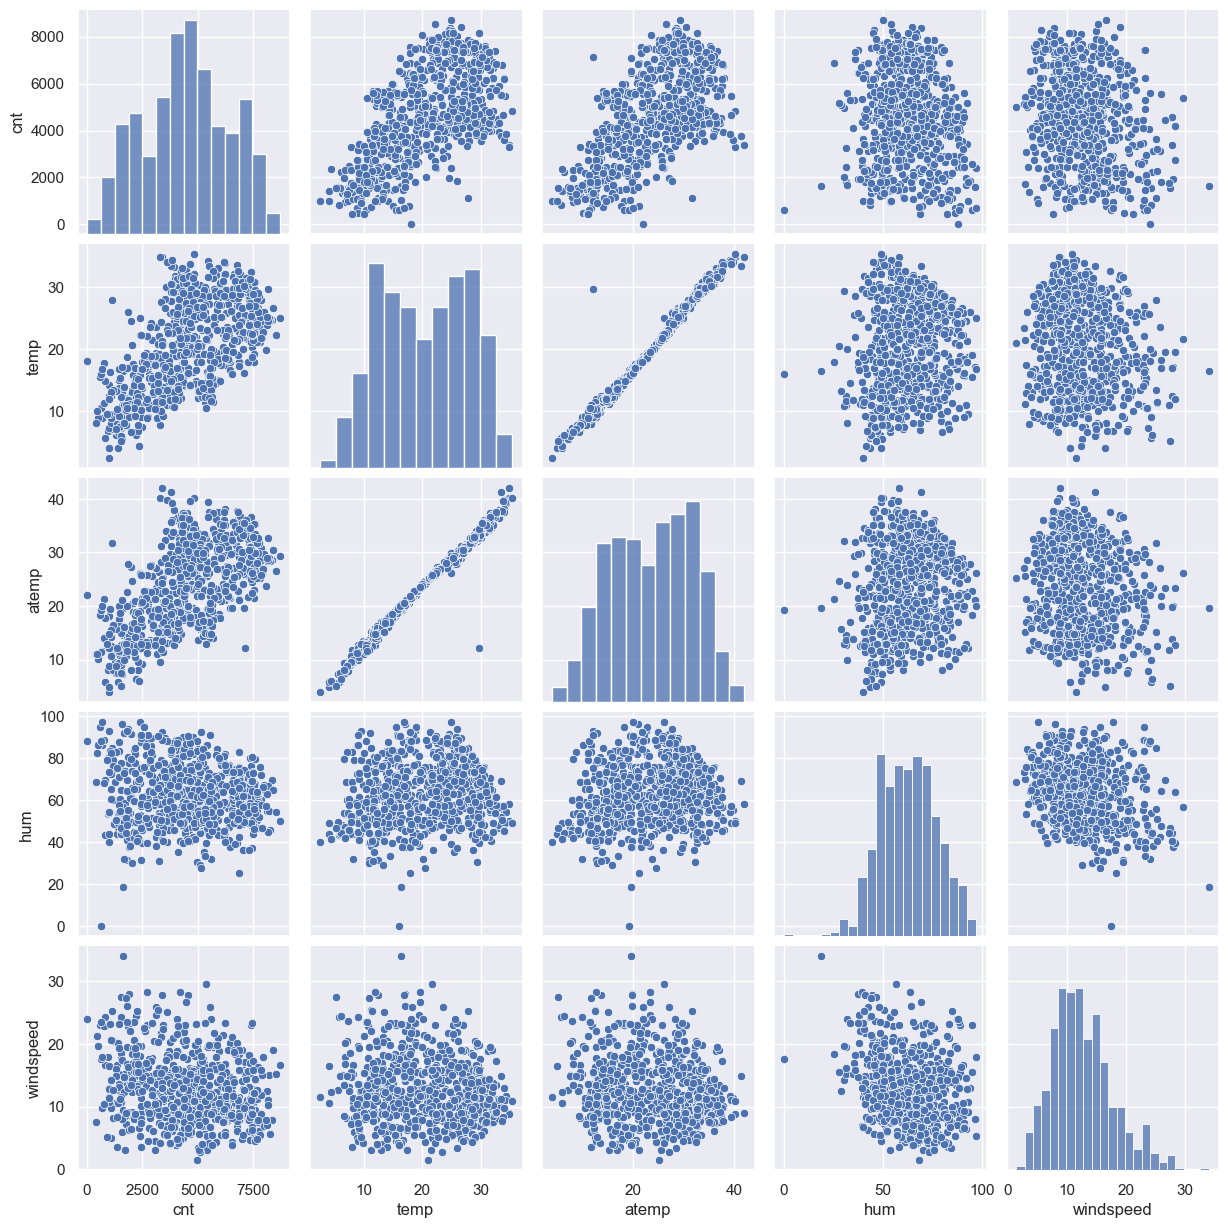

In [22]:
sns.pairplot(data=bike_data, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

## plotting  to check for linear relation between target variable and predictive numerical variables

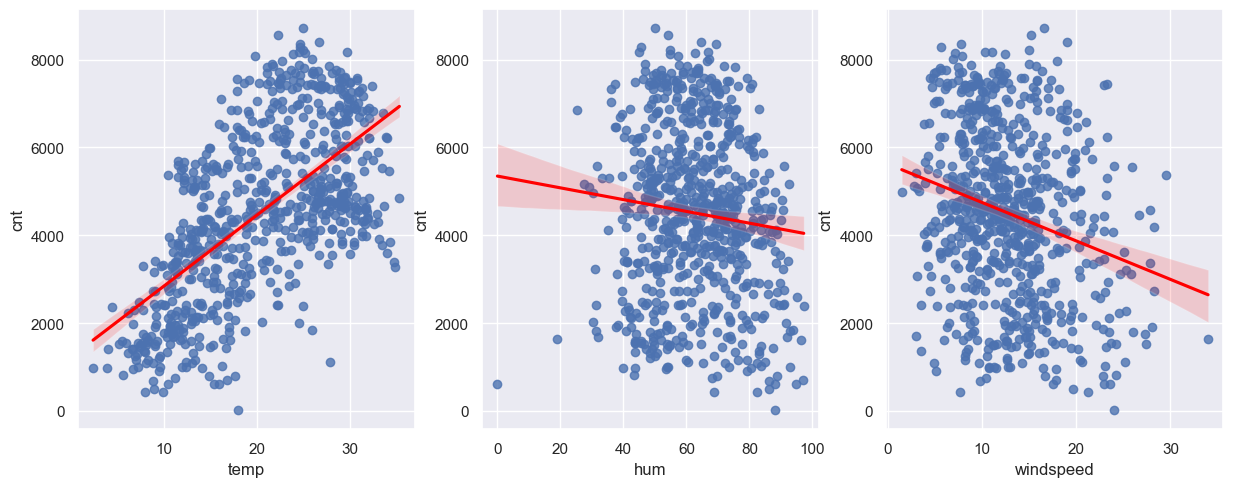

In [23]:
#plotting for temp , hum , windspeed
plt.figure(figsize=(20, 12))
plt.subplot(2,4,2)
sns.regplot(x = 'temp', y = 'cnt', data = bike_data,line_kws={"color": "red"})
plt.subplot(2,4,3)
sns.regplot(x = 'hum', y = 'cnt', data = bike_data,line_kws={"color": "red"})
plt.subplot(2,4,4)
sns.regplot(x = 'windspeed', y = 'cnt', data = bike_data,line_kws={"color": "red"})
plt.show()

here we can see that temp is significant factor with respect to ride mean count 

<Axes: xlabel='holiday', ylabel='cnt'>

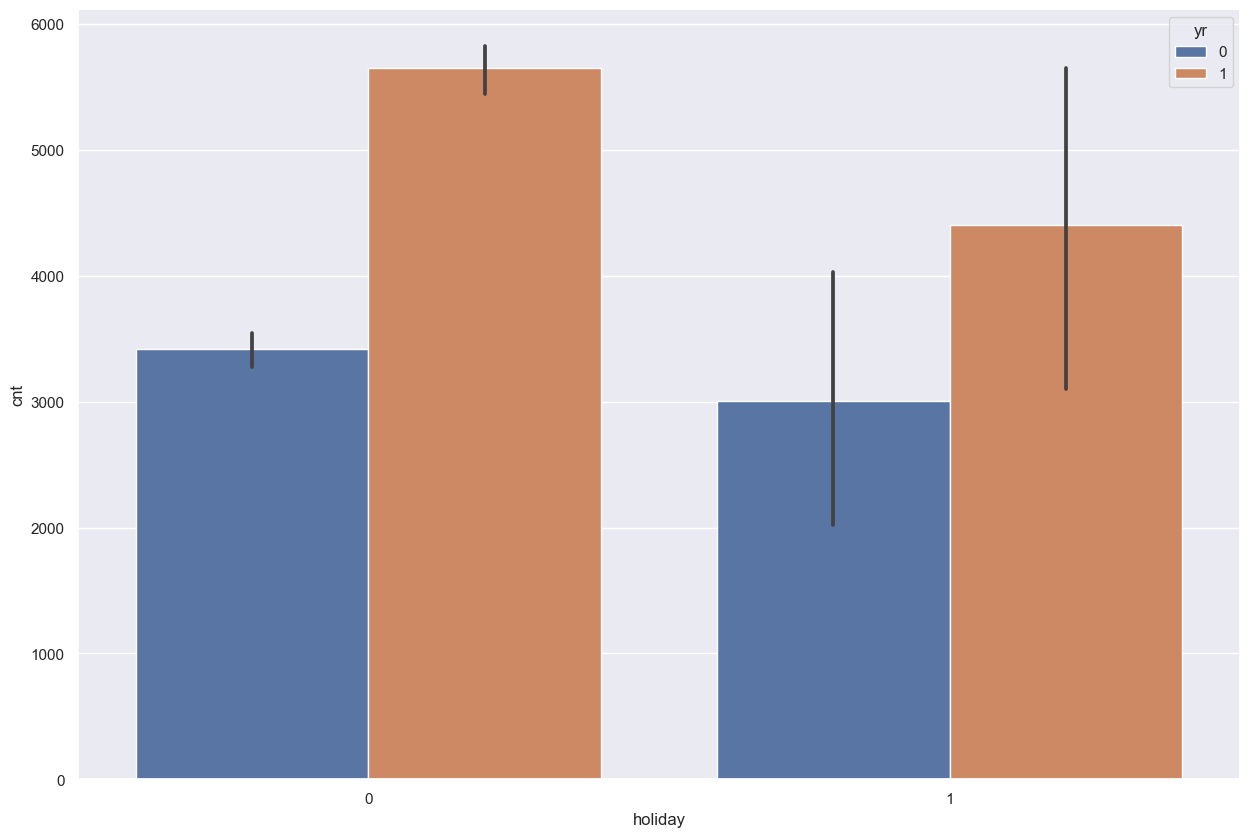

In [24]:
#plotting for yr, working day , holiday 
sns.barplot(data=bike_data, x='holiday', y='cnt' ,hue='yr')

<Axes: xlabel='workingday', ylabel='cnt'>

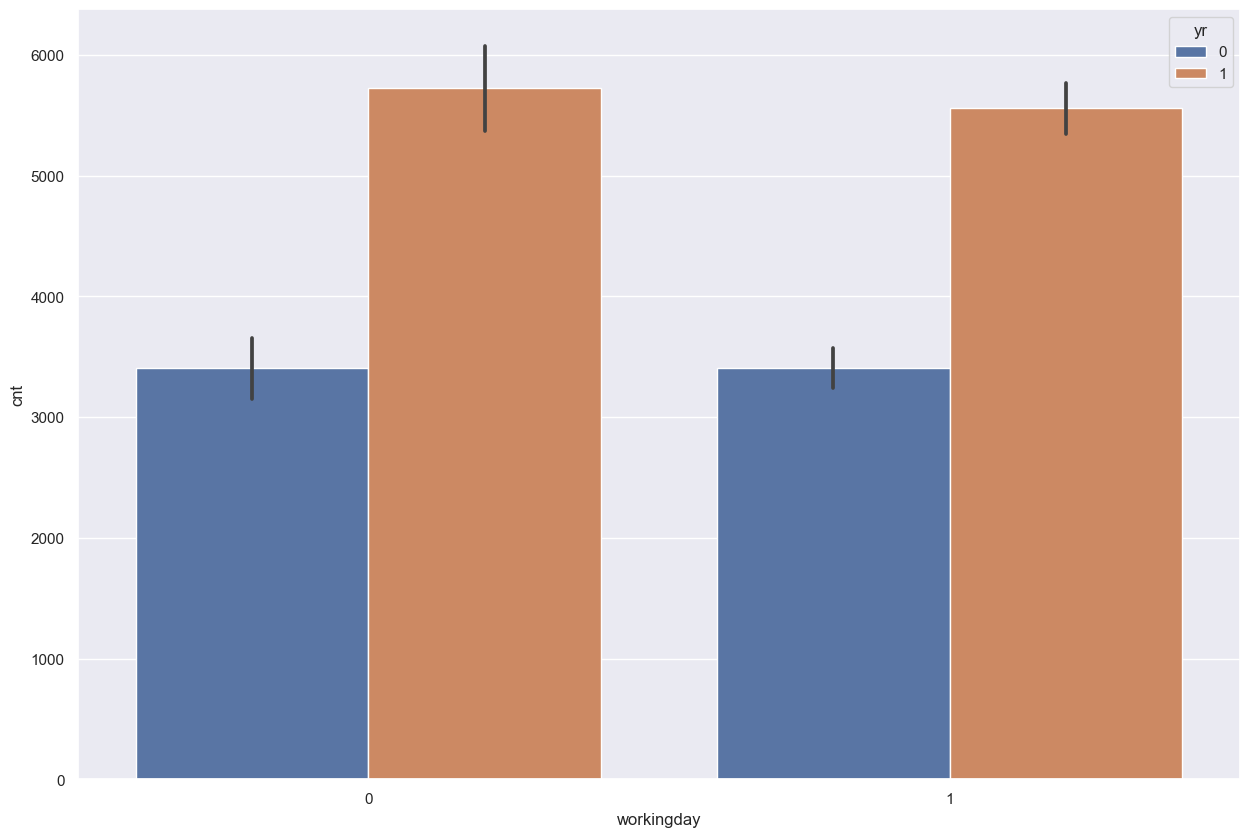

In [25]:
sns.barplot(data=bike_data, x='workingday', y='cnt' ,hue='yr')

hence we can see that workingday,holiday and year is decisive factors 

## Data preparation for linar regression

### Dummy encoding

In [26]:
#creating dummy variables
bike_data = pd.get_dummies(data=bike_data,columns=["season","mnth","weekday"],drop_first=True)
bike_data = pd.get_dummies(data=bike_data,columns=["weathersit"])

In [27]:
bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Clear', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [28]:
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## splitting data into train and test 

In [29]:
#Train Test split with 70:30 ratio
df_train ,df_test = train_test_split(bike_data, train_size = 0.7,test_size=0.3, random_state=100)

In [30]:
print(df_train.shape)
print(df_test.shape)

(510, 31)
(219, 31)


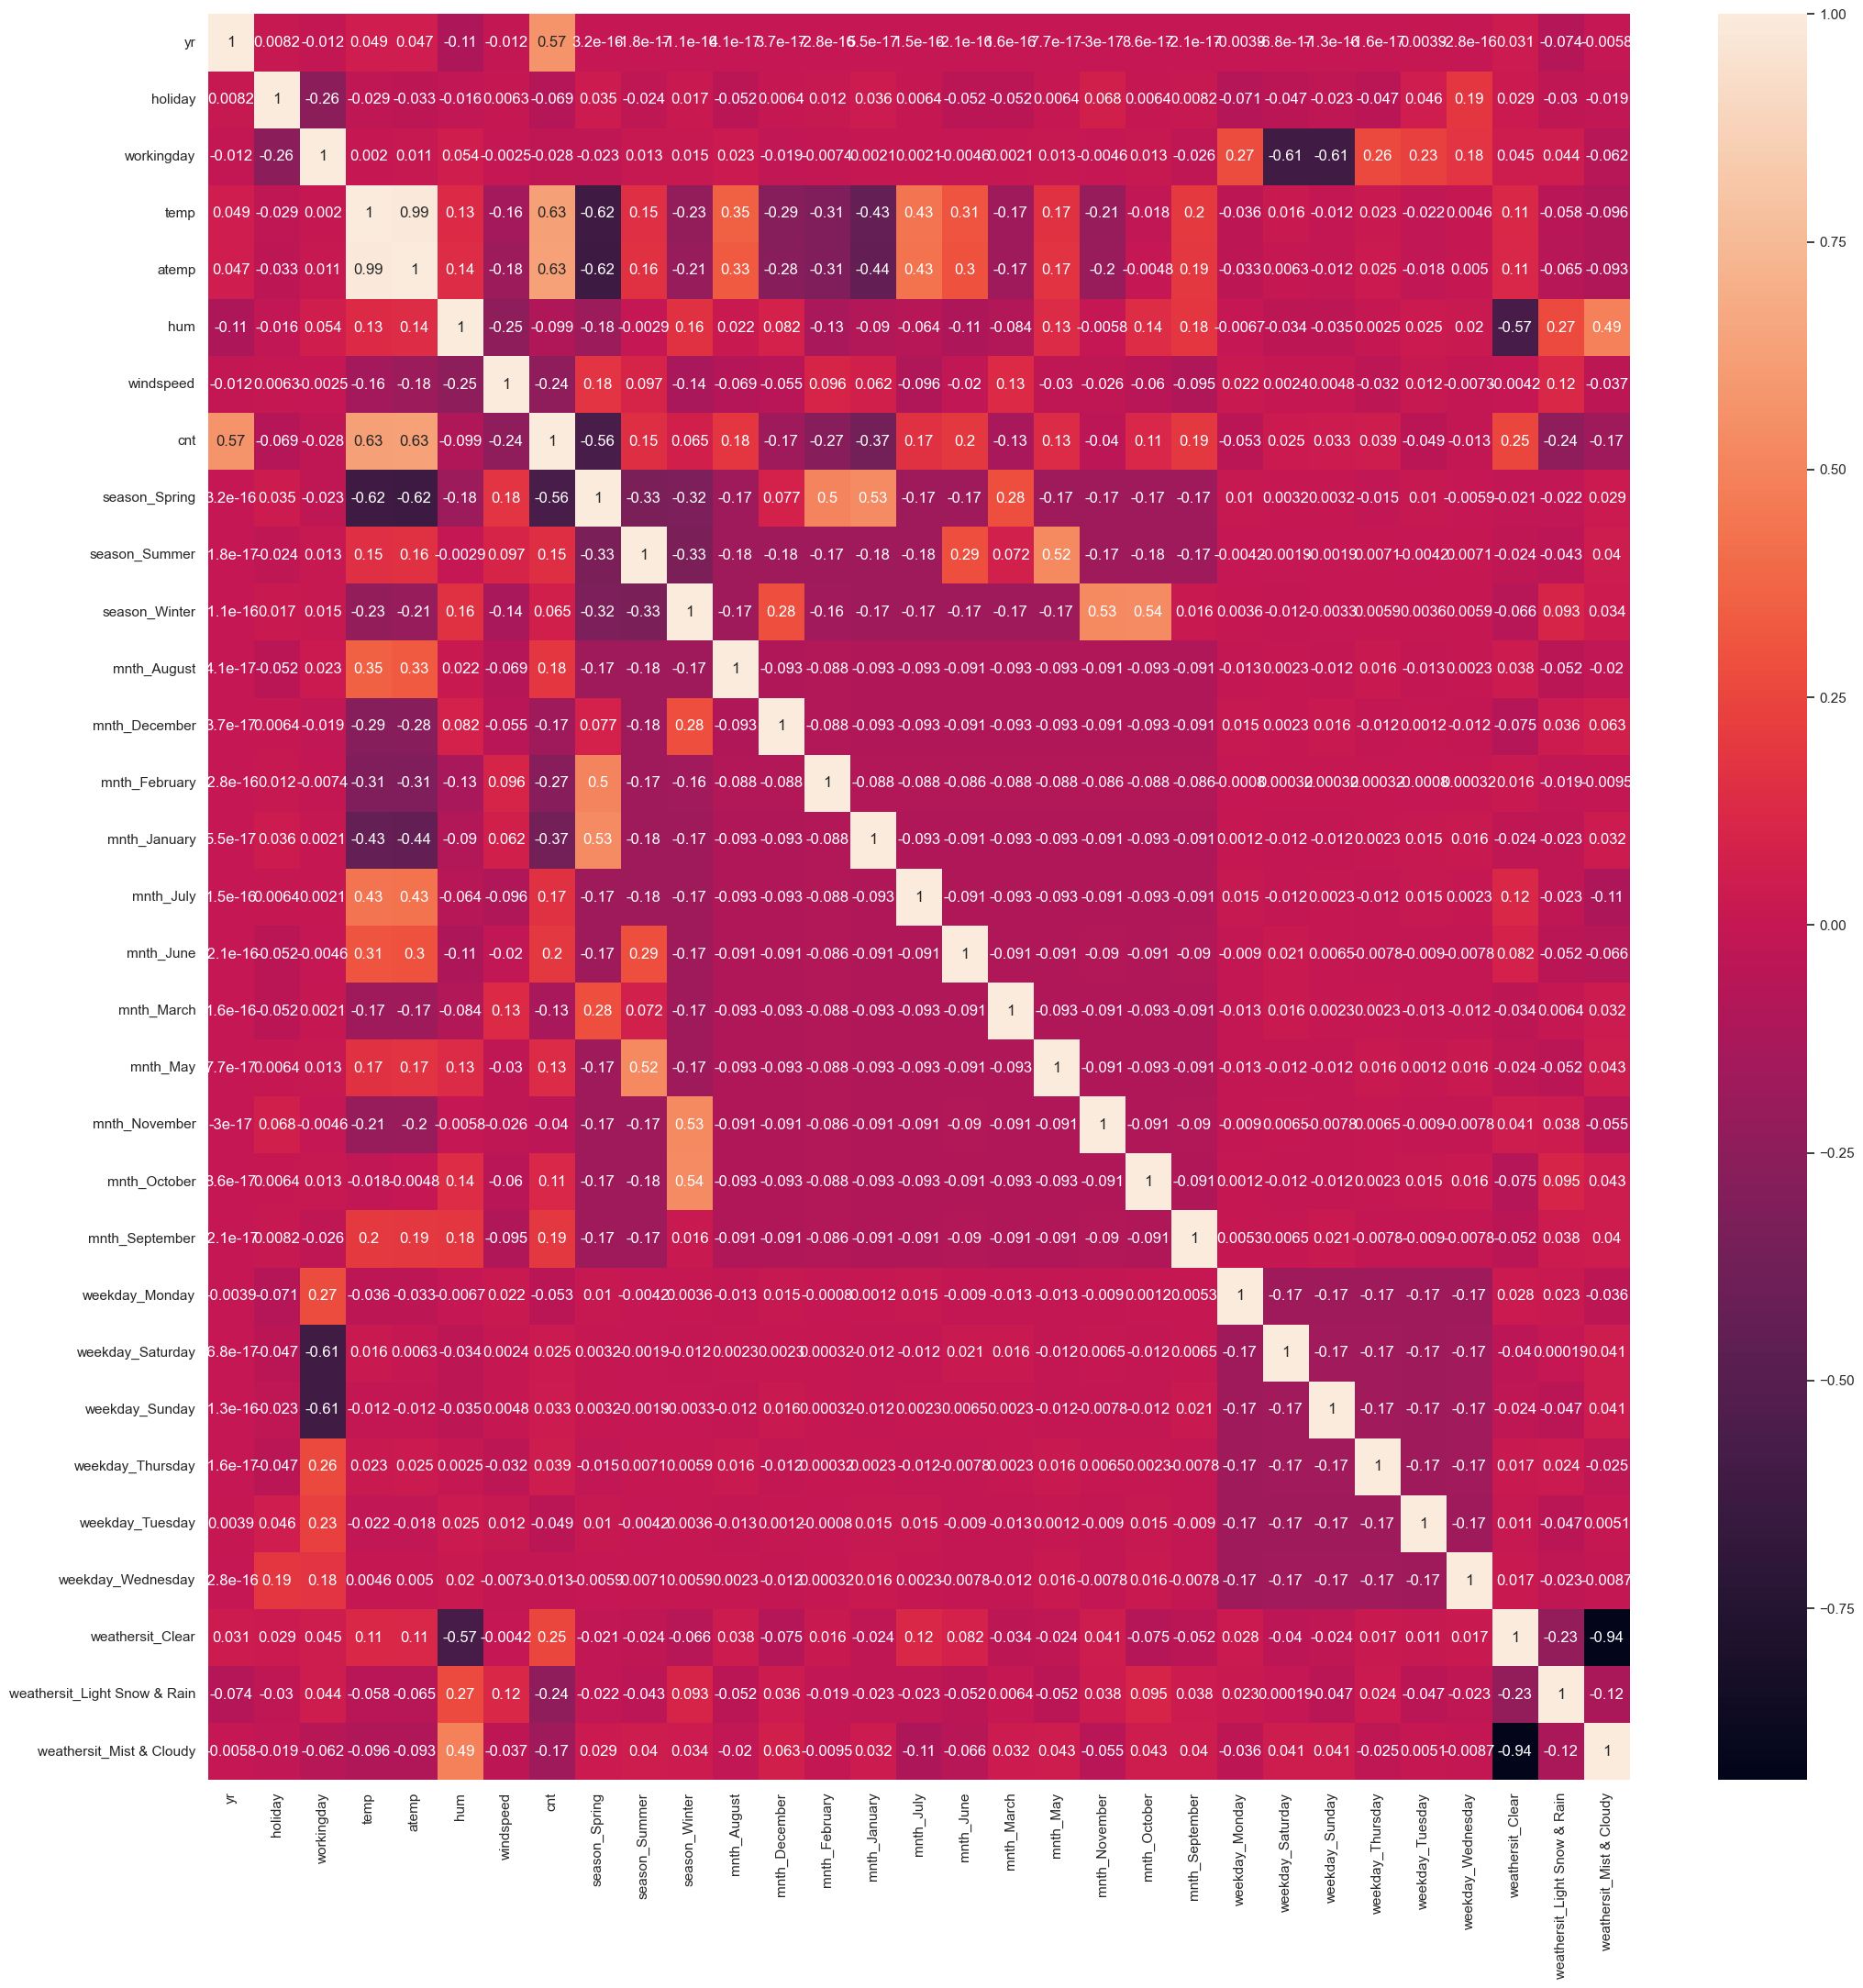

In [31]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25,25))
sns.heatmap(bike_data.corr(), annot = True)
plt.show()

## Rescaling 

In [32]:
#Creating list of all numerical variable 
num_vars = ['cnt','hum','windspeed','temp','atemp']
#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only


df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [33]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.627451,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing into X and Y sets for the model building

In [34]:
y_train = df_train.pop('cnt')
X_train = df_train

In [35]:
y_train.shape

(510,)

## Model buidling using RFE

In [36]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [38]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_August', False, 11),
 ('mnth_December', False, 2),
 ('mnth_February', False, 3),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 15),
 ('mnth_March', False, 16),
 ('mnth_May', False, 8),
 ('mnth_November', True, 1),
 ('mnth_October', False, 13),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', False, 5),
 ('weekday_Sunday', False, 6),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [39]:
#columns rfe selected 
col1= X_train.columns[rfe.support_]
col1

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weathersit_Clear',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy'],
      dtype='object')

In [40]:
#columns rfe did not select 
col2 = X_train.columns[~ rfe.support_]
col2

Index(['workingday', 'atemp', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_October', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [41]:
X_train_rfe = X_train[col1]

# Building Model

### Model-1 

In [42]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          2.25e-189
Time:                        12:12:34   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Calculate VIF 

In [43]:
vif = pd.DataFrame()
vif['Features']= X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
12,weathersit_Clear,49.16
14,weathersit_Mist & Cloudy,32.33
5,season_Spring,5.20
13,weathersit_Light Snow & Rain,4.16
2,temp,3.97
7,season_Winter,3.77
6,season_Summer,2.67
3,hum,1.91
8,mnth_January,1.57
9,mnth_July,1.49


In [44]:
# dropping mnth_november column as it has high p value 
X_train_new = X_train_rfe.drop([ 'mnth_November'] , axis = 1)

## Model -2

In [45]:
#Calculating VIF
vif = pd.DataFrame()
vif['Features']= X_train_new.columns
vif['VIF']= [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
11,weathersit_Clear,48.17
13,weathersit_Mist & Cloudy,31.81
5,season_Spring,5.08
12,weathersit_Light Snow & Rain,4.13
2,temp,3.89
7,season_Winter,3.60
6,season_Summer,2.64
3,hum,1.91
8,mnth_January,1.57
9,mnth_July,1.49


In [46]:
#Building 2nd model
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          4.45e-190
Time:                        12:12:34   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [47]:
#dropping mnth_January variable as it has high p value
X_train_new2= X_train_new.drop([ 'mnth_January'] , axis = 1)

## Model -3

In [48]:
vif = pd.DataFrame()
vif['Features']= X_train_new2.columns
vif['VIF']= [variance_inflation_factor(X_train_new2.values,i) for i in range(X_train_new2.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
10,weathersit_Clear,46.67
12,weathersit_Mist & Cloudy,30.98
5,season_Spring,5.02
11,weathersit_Light Snow & Rain,4.09
2,temp,3.61
7,season_Winter,3.49
6,season_Summer,2.61
3,hum,1.90
8,mnth_July,1.48
9,mnth_September,1.30


In [49]:
X_train_lm_3 = sm.add_constant(X_train_new2)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          1.69e-190
Time:                        12:12:34   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [50]:
#Dropping weathersit_Pleasant variable because it has very high VIF
X_train_new3= X_train_new2.drop(['weathersit_Clear'], axis = 1)

## Model 4

In [51]:
vif = pd.DataFrame()
vif['Features']= X_train_new3.columns
vif['VIF']= [variance_inflation_factor(X_train_new3.values,i) for i in range(X_train_new3.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,season_Spring,4.01
7,season_Winter,3.35
6,season_Summer,2.78
11,weathersit_Mist & Cloudy,2.28
0,yr,2.08
8,mnth_July,1.58
9,mnth_September,1.38


In [52]:
X_train_lm_4 = sm.add_constant(X_train_new3)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          1.69e-190
Time:                        12:12:34   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [53]:
#dropping 
X_train_new4= X_train_new3.drop(['hum'], axis = 1)

## Model 5

In [54]:
vif = pd.DataFrame()
vif['Features']= X_train_new4.columns
vif['VIF']= [variance_inflation_factor(X_train_new4.values,i) for i in range(X_train_new4.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_Summer,2.21
4,season_Spring,2.08
0,yr,2.07
6,season_Winter,1.79
7,mnth_July,1.58
10,weathersit_Mist & Cloudy,1.55
8,mnth_September,1.34
9,weathersit_Light Snow & Rain,1.08


In [55]:
X_train_lm_5 = sm.add_constant(X_train_new4)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          2.40e-187
Time:                        12:12:35   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Now that VIF which is acceptable andp-value for all the features is less than 0.05 and R2 is 0.836 we will go with this model as our final model as it has all important statistics like high (R-square, Adjusted R-squared and F-statistic), Also it shows no insignificant variables and no multicollinearty (high VIF) variables. The difference between R-square and Adjusted R-square is 0.004 which shows that no further variables are required to be removed from this model.

In [56]:
lr_5.params

const                           0.199648
yr                              0.233482
holiday                        -0.098013
temp                            0.491508
windspeed                      -0.147977
season_Spring                  -0.066942
season_Summer                   0.045280
season_Winter                   0.083084
mnth_July                      -0.052418
mnth_September                  0.076686
weathersit_Light Snow & Rain   -0.285155
weathersit_Mist & Cloudy       -0.081558
dtype: float64

### Residual Analysis of the train data and validation

In [57]:
X_train_lm_5

,const,yr,holiday,temp,windspeed,season_Spring,season_Summer,season_Winter,mnth_July,mnth_September,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
653,1.0,1,0,0.509887,0.300794,0,0,1,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,1,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,1,0,0,0,0,1
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,0,1


In [58]:
y_train_pred = lr_5.predict(X_train_lm_5)

### Normality of error terms

Text(0.5, 0, 'Errors')

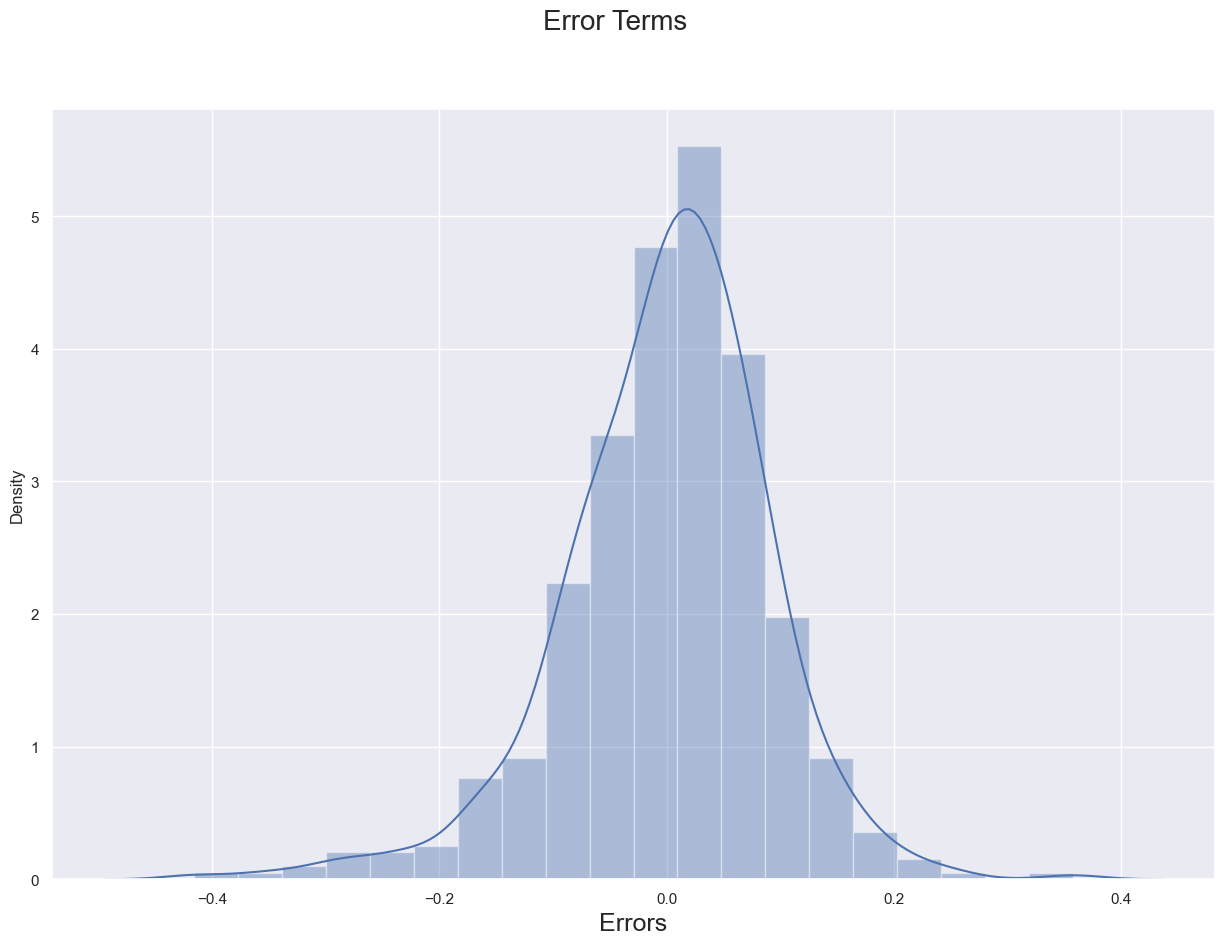

In [59]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### Error terms are normally distributed 

### Making Predictions Using the Final Model

In [60]:
from sklearn.metrics import r2_score


In [61]:
#Print R-squared Value
r2_score(y_train,y_train_pred)


0.8357767594654057

## Prediction of values on test dataset

#### Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

### Applying the scaling on the test sets

In [62]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [63]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.652968,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.477117,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing into X_test and y_test

In [64]:
y_test = df_test.pop('cnt')
X_test = df_test

In [65]:
col1 = X_train_new4.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

In [66]:
X_test_sm.head()

,const,yr,holiday,temp,windspeed,season_Spring,season_Summer,season_Winter,mnth_July,mnth_September,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
184,1.0,0,1,0.831783,0.084219,0,0,0,1,0,0,1
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0,0


In [67]:
y_pred = lr_5.predict(X_test_sm)

### Calculating the r-squared
R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [68]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_pred))

r2_score of train dataset 0.8357767594654057
r2_score of test dataset 0.8049418440982381


### Inference:
We can see that the r_squared on the test set is 0.804 and the r-squared on the trained set 0.835 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

# Model Evaluation

Text(0, 0.5, 'y_pred')

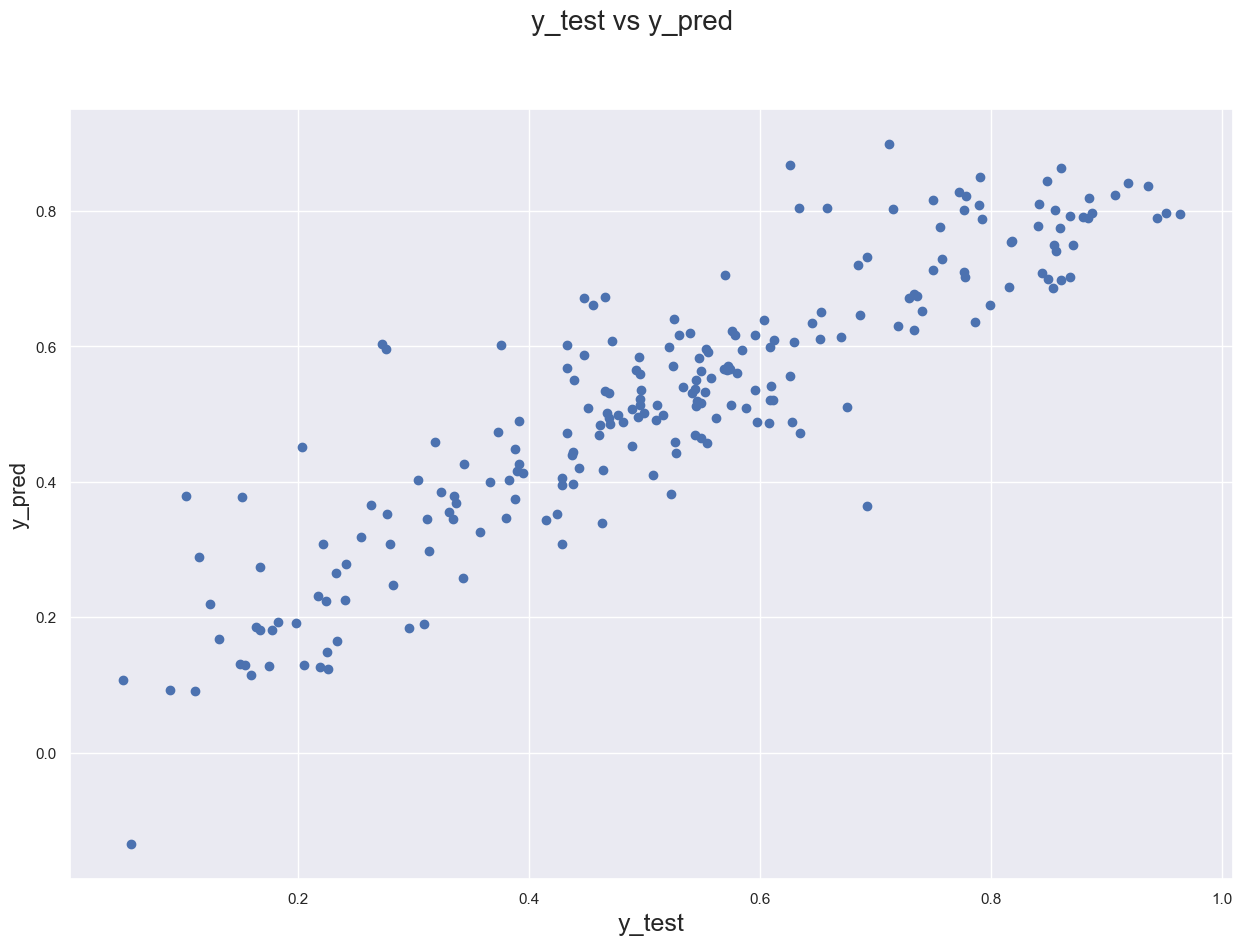

In [69]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

# Getting the variable names and the coefficient values for the final equation of the best fitted line

In [70]:
param = pd.DataFrame(lr_5.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.491508
1,yr,0.233482
0,const,0.199648
7,season_Winter,0.083084
9,mnth_September,0.076686
6,season_Summer,0.045280
8,mnth_July,-0.052418
5,season_Spring,-0.066942
11,weathersit_Mist & Cloudy,-0.081558


# Final conclusion

#### By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

#### cnt = 0.199 +0.491 X temp + 0.233 X yr + 0.083 X season_winter + 0.766 X mnth_September + 0.045 X season_smmer - 0.052 X mnth_july  - 0.066 X season spring - 0.081 X weathersit_Mist & Cloudy - 0.098 X holiday - 0.147 X windspeed - 0.285 Xweathersit_Light Snow & Rain


All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 83% of bike demand.

Coeffiencients of the variables explains the factors effecting the bike demand

Based on final model top three features contributing significantly towards explaining the demand are:

Temperature (0.491)

weathersit :  weathersit_Light Snow & Rain(-0.285)

year (0.233)

#### Hence, it can be clearly concluded that the variables temperature , season/ weather situation and month/year are significant in predicting the demand for shared bikes .

# Final Recommendations for the Company:
 
- The months - May, jun , Jul , aug , sep  should be considered by the company as they have a higher demand as compared to other months.
- With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
- During the Winter season the demand rises, hence it should be well prepared to meet the high demand.
- Holiday time seems to be least interesting bor biking, little motavation and marketing might help here.